Homework 4 MG

In [201]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
from statannotations.Annotator import Annotator
from itertools import combinations

In [203]:
community_dataset = pd.read_csv('community_dataset.csv')

In [204]:
community_dataset.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


Задача 1

Есть ли стат-значимость между

а) между типом клетки и размером клетки

In [205]:
community_dataset[['cell_type', 'area_of_cell']]

,cell_type,area_of_cell
0,Stroma cells,185
1,Stroma cells,209
2,Stroma cells,254
3,Unclassified,156
4,Unclassified,194
...,...,...
269437,Stroma cells,258
269438,Immune type 1,160
269439,Unclassified,190
269440,Stroma cells,535


In [206]:
order = community_dataset['age_group'].unique()
order

array(['elder_group', 'young_group'], dtype=object)

In [207]:
pairs = list(combinations(order, 2))
pairs

[('elder_group', 'young_group')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.017e-01 U_stat=5.942e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:3.789e-03 U_stat=4.619e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:5.130e-04 U_stat=3.348e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
 

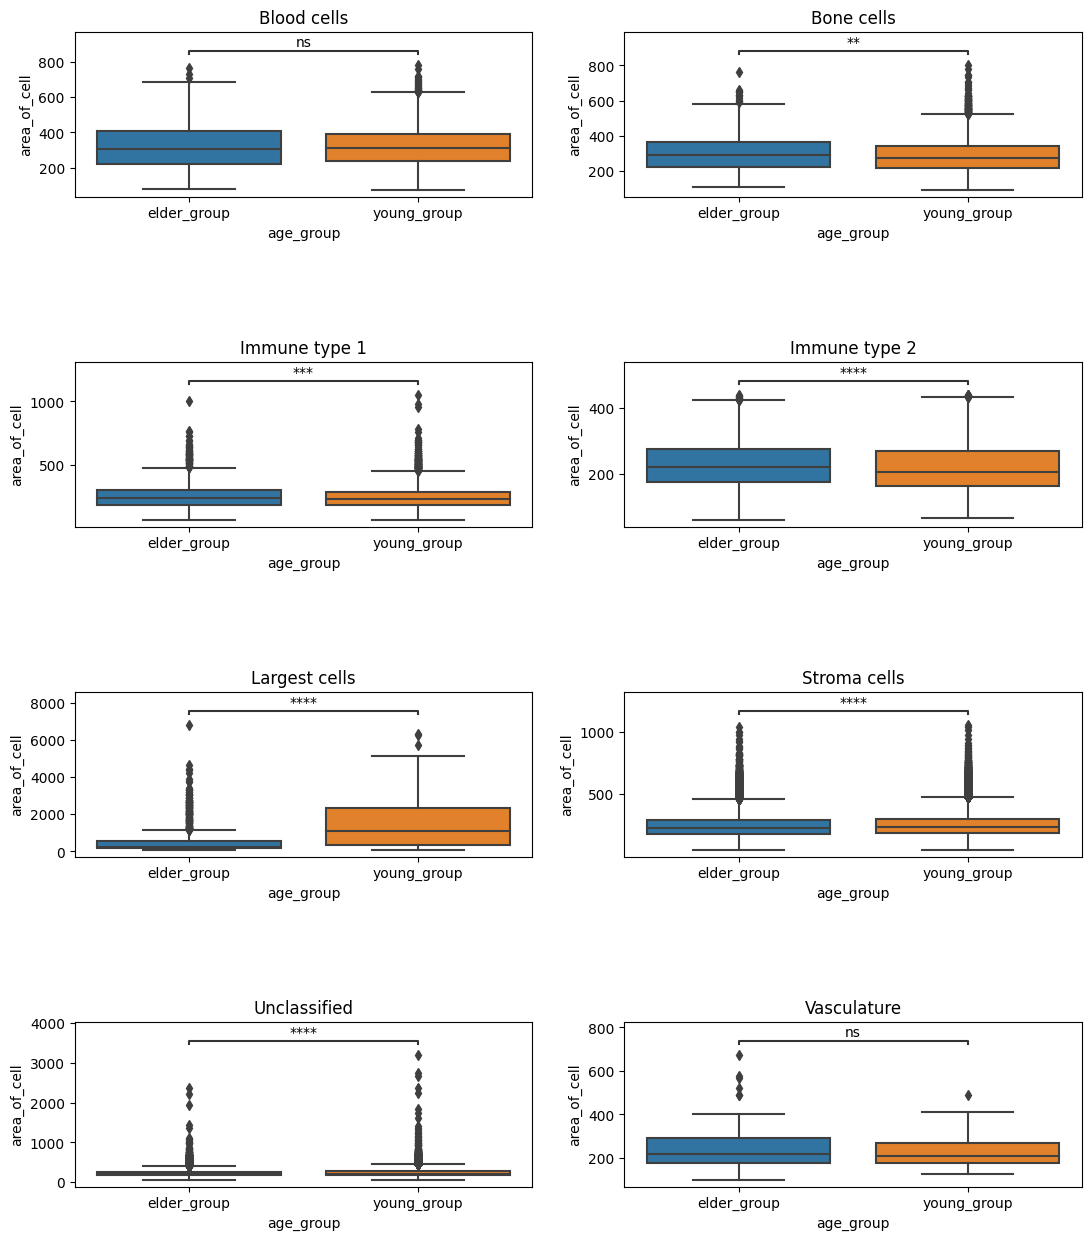

In [208]:
grouped = community_dataset.groupby(by='cell_type')[['area_of_cell', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['area_of_cell'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="area_of_cell", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()
   

во всех клетках кроме blood_cell и vascularize, 

площадь клетки (area_of_cell) у молодых и возврастных пациентов значимо отличается

In [209]:
from statannotations.Annotator import Annotator
from itertools import combinations

In [210]:
order = community_dataset['age_group'].unique()

б) между типом клетки и экспрессией иммунных маркеров (immune_marker_1, immune_marker_2)

In [211]:
community_dataset[['cell_type', 'immune_marker_1']]

,cell_type,immune_marker_1
0,Stroma cells,10.803755
1,Stroma cells,11.749179
2,Stroma cells,15.124372
3,Unclassified,14.221883
4,Unclassified,19.978977
...,...,...
269437,Stroma cells,9.667603
269438,Immune type 1,20.298864
269439,Unclassified,10.351852
269440,Stroma cells,11.459289


In [212]:
order = community_dataset['age_group'].unique()
order

array(['elder_group', 'young_group'], dtype=object)

In [213]:
pairs = list(combinations(order, 2))
pairs

[('elder_group', 'young_group')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.806e-27 U_stat=7.804e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.974e-17 U_stat=5.371e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:7.746e-126 U_stat=4.453e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03


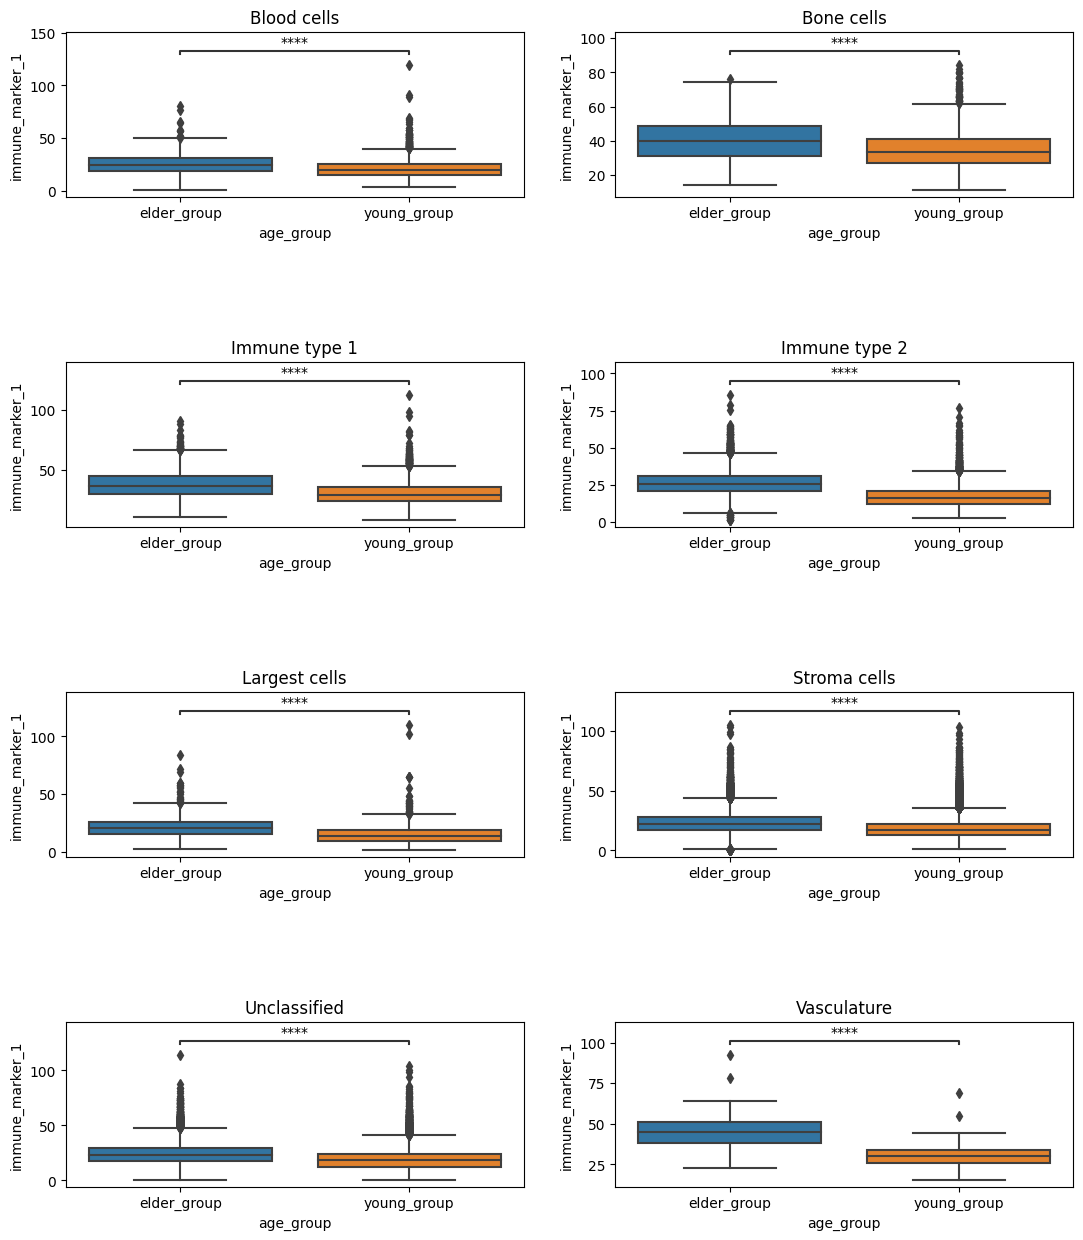

In [214]:
grouped = community_dataset.groupby(by='cell_type')[['immune_marker_1', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['immune_marker_1'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="immune_marker_1", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()

во всех клетках экспрессия immune_marker_1 у молодых и возврастных пациентов значимо отличается

In [215]:
community_dataset[['cell_type', 'immune_marker_2']]

,cell_type,immune_marker_2
0,Stroma cells,187.998971
1,Stroma cells,155.357076
2,Stroma cells,182.626888
3,Unclassified,158.381917
4,Unclassified,159.071269
...,...,...
269437,Stroma cells,29.866927
269438,Immune type 1,40.847738
269439,Unclassified,22.967870
269440,Stroma cells,57.536165


In [216]:
order = community_dataset['age_group'].unique()
order

array(['elder_group', 'young_group'], dtype=object)

In [217]:
pairs = list(combinations(order, 2))
pairs

[('elder_group', 'young_group')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.302e-01 U_stat=6.020e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:1.944e-04 U_stat=3.730e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:7.192e-97 U_stat=2.028e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
 

KeyboardInterrupt: 

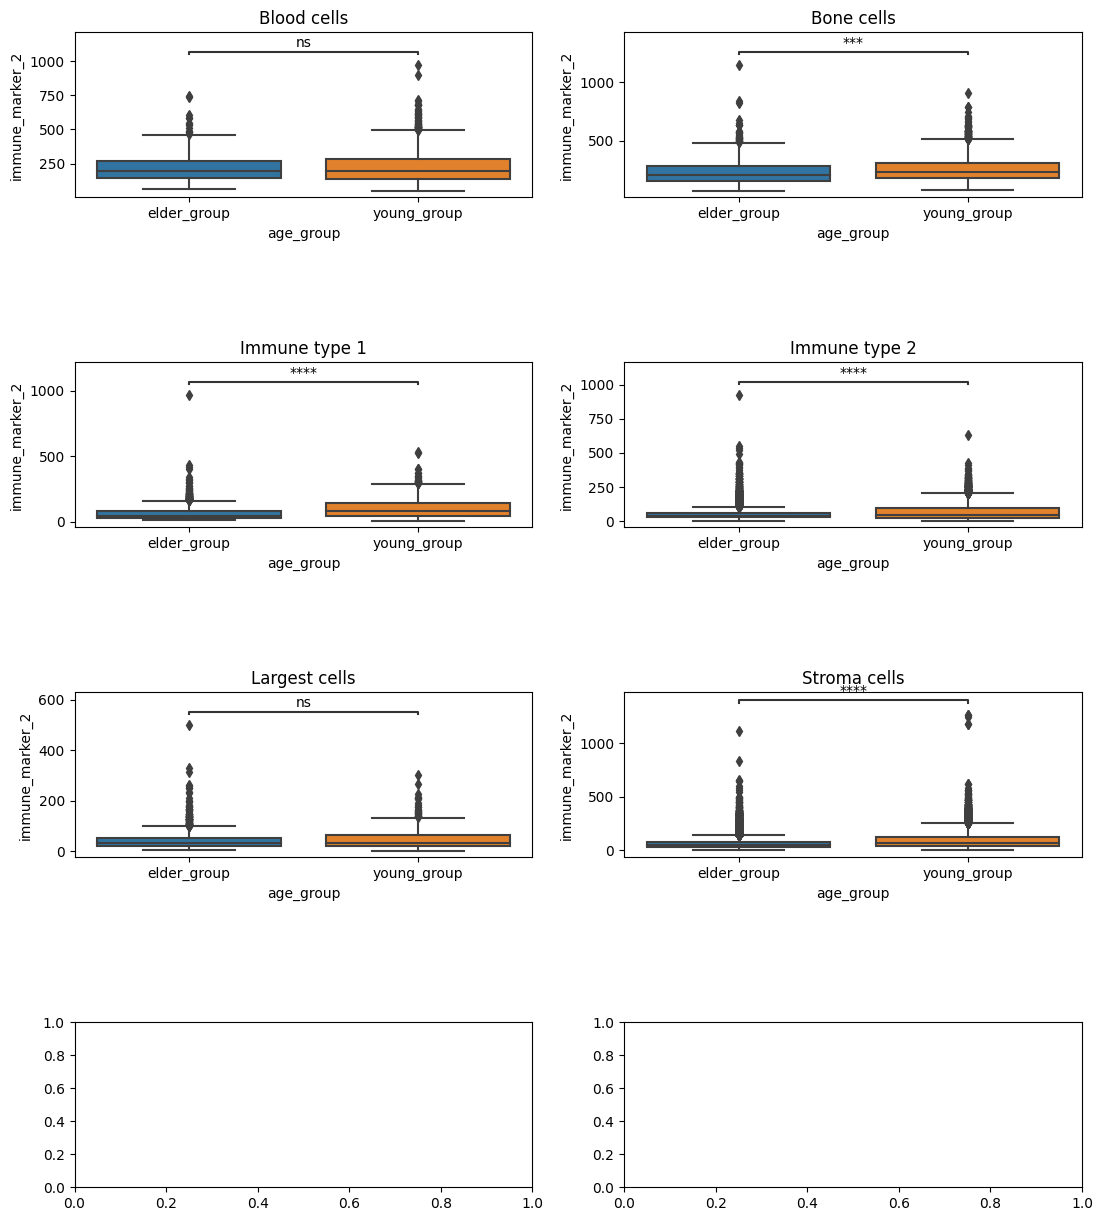

In [218]:
grouped = community_dataset.groupby(by='cell_type')[['immune_marker_2', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['immune_marker_2'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="immune_marker_2", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()

во всех клетках, кроме blood_cells и largest_cells экспрессия immune_marker_2 у молодых и возврастных пациентов значимо отличается

в) между типом клетки и дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell)

In [ ]:
community_dataset[['cell_type', 'distance_to_vasculature']]

,cell_type,distance_to_vasculature
0,Stroma cells,988.509380
1,Stroma cells,787.852379
2,Stroma cells,960.635580
3,Unclassified,702.033032
4,Unclassified,830.399371
...,...,...
269437,Stroma cells,928.977004
269438,Immune type 1,651.888363
269439,Unclassified,754.601247
269440,Stroma cells,901.768538


In [ ]:
order = community_dataset['age_group'].unique()
order

array(['elder_group', 'young_group'], dtype=object)

In [ ]:
pairs = list(combinations(order, 2))
pairs

[('elder_group', 'young_group')]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:9.418e-53 U_stat=3.421e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.128e-47 U_stat=2.289e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.313e-132 U_stat=1.833e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03


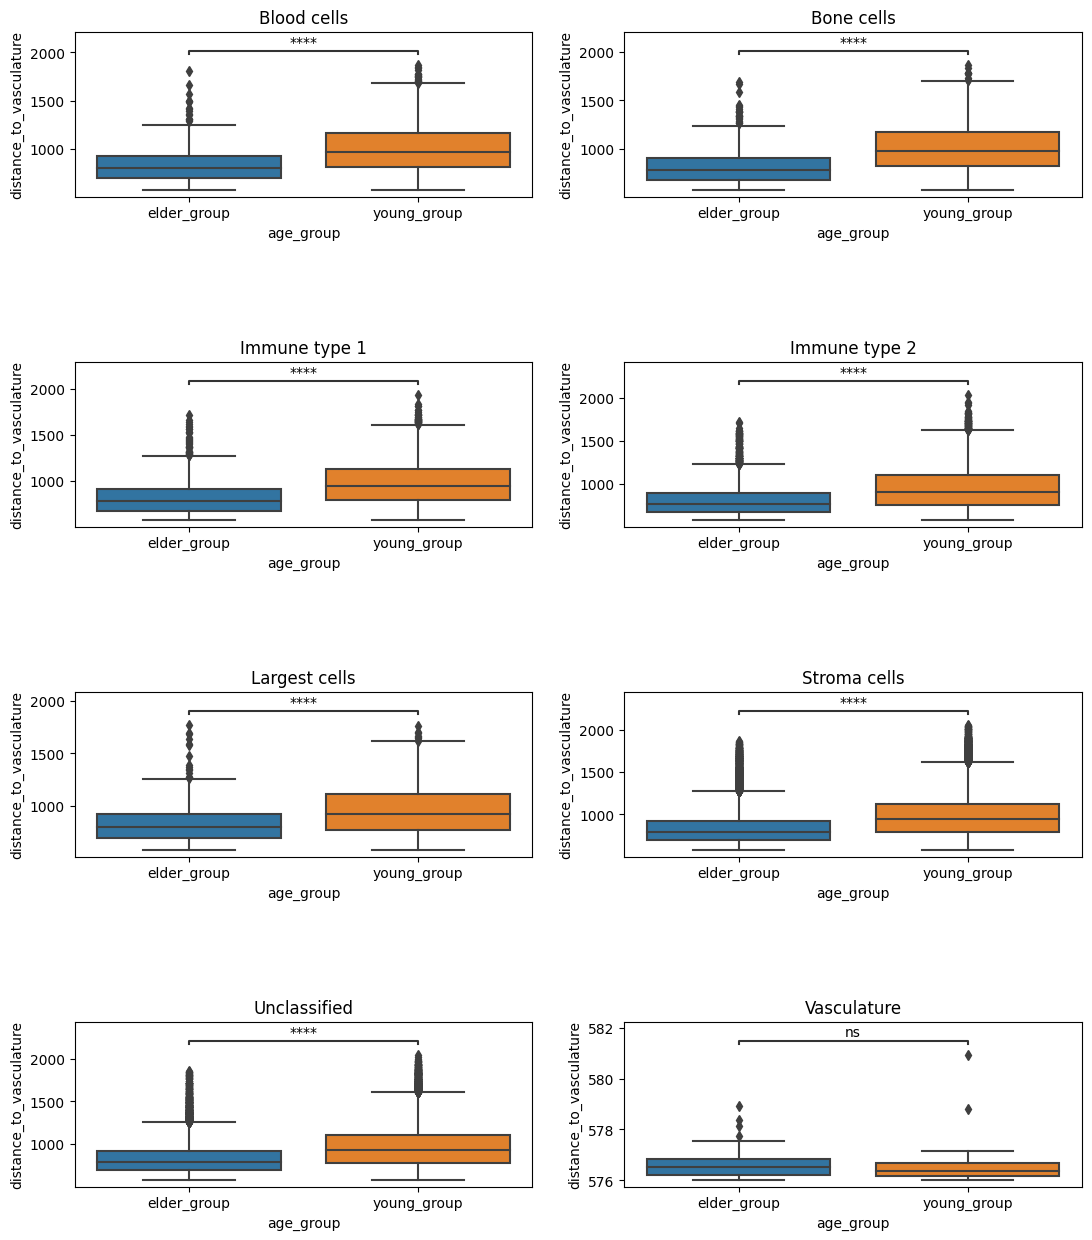

In [ ]:
grouped = community_dataset.groupby(by='cell_type')[['distance_to_vasculature', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['distance_to_vasculature'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="distance_to_vasculature", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()

во всех клетках, кроме vasculature у молодых и возврастных пациентов значимо отличается

In [ ]:
community_dataset[['cell_type', 'distance_to_largest_cell']]

In [ ]:
order = community_dataset['age_group'].unique()
order

In [ ]:
pairs = list(combinations(order, 2))
pairs

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:2.110e-06 U_stat=5.188e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.455e-05 U_stat=3.703e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

elder_group vs. young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:8.844e-01 U_stat=3.152e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
 

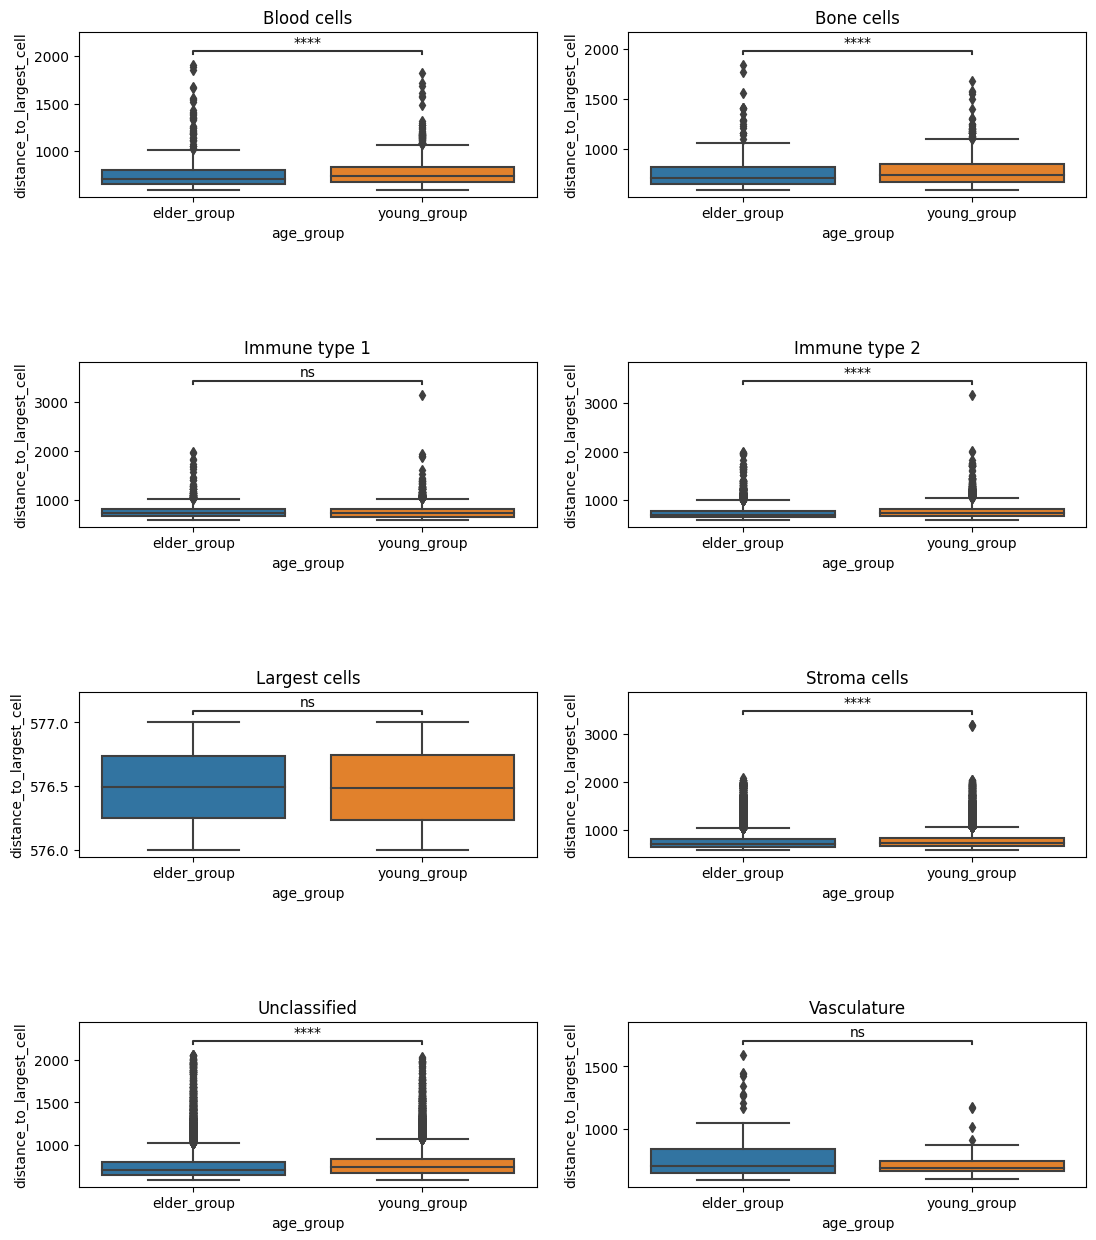

In [ ]:
grouped = community_dataset.groupby(by='cell_type')[['distance_to_largest_cell', 'age_group']]

n_groups = community_dataset['cell_type'].nunique()

fig, ax = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(13,15)
plt.subplots_adjust(hspace=1)

for index, (key, group) in enumerate(grouped):
      sns.boxplot(x=group['age_group'], y=group['distance_to_largest_cell'], ax=ax[index//2, index%2], order=order)
      ax[index//2, index%2].set_title(key, loc='center')
      
      annotator = Annotator(ax[index//2, index%2], 
                            pairs, 
                            data=group, 
                            x='age_group', 
                            y="distance_to_largest_cell", 
                            order=order)
      annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
      annotator.apply_and_annotate()

во всех клетках, кроме immune type 1, vasculature и largest cells  у молодых и возврастных пациентов значимо отличается

Задача 2

В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction).

In [ ]:
df_interaction = community_dataset[['cell_interaction', 
                   'case_id', 'cell_type', 
                   'area_of_cell'
                   ]].groupby(by=['cell_interaction', 
                                         'case_id', 
                                         'cell_type']).count().reset_index().rename({'area_of_cell' : 'count'}, axis=1)
                   
df_interaction

In [ ]:
cell_types = df_interaction['cell_type'].unique()
cell_types

array(['Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
       'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature'],
      dtype=object)

blood cells

In [ ]:
blood_cells = df_interaction[df_interaction['cell_type'] == 'Blood cells']
blood_cells

Text(0.5, 1.0, 'Blood cells')

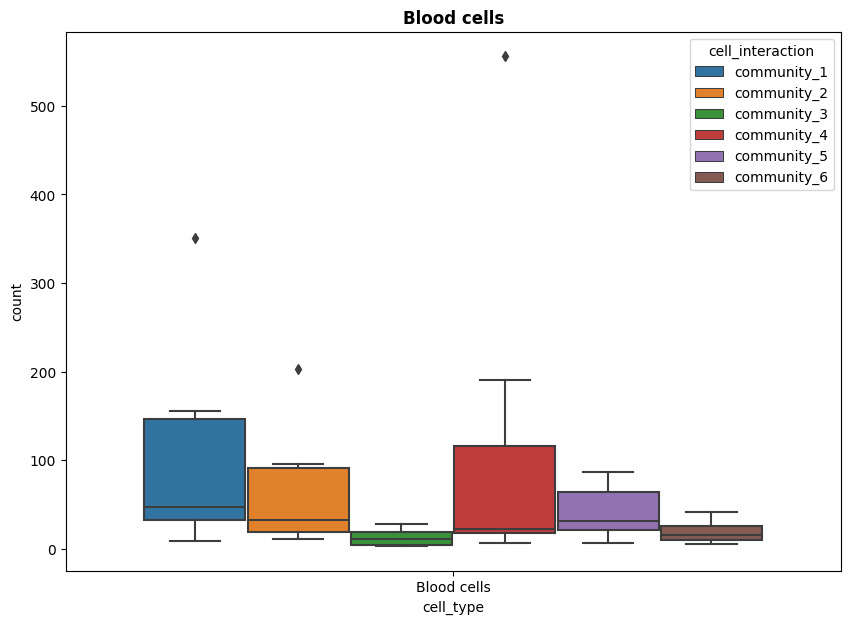

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=blood_cells['cell_type'], y=blood_cells['count'], hue = blood_cells['cell_interaction']) 
ax.set_title('Blood cells', fontweight='bold')

Сравниваем 2 и более группы
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [ ]:
stats.kruskal(blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_2']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_3']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_4']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_5']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=13.595872269911977, pvalue=0.018390883472722126)

H0 - медианы всех групп одинаковые. p-val < 0.05, гипотезу отвергаем

In [ ]:
import scikit_posthocs as sp

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_2']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_3']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_4']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_5']['count'],
              blood_cells[blood_cells['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,True,False,True,True,False
2,True,True,False,True,True,True
3,False,False,True,False,False,True
4,True,True,False,True,True,True
5,True,True,False,True,True,True
6,False,True,True,True,True,True


In [ ]:
stats.mannwhitneyu(x=blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
                   y=blood_cells[blood_cells['cell_interaction'] == 'community_4']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=38.0, pvalue=0.2816183135715713)

In [ ]:
stats.mannwhitneyu(x=blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
                   y=blood_cells[blood_cells['cell_interaction'] == 'community_2']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=39.0, pvalue=0.25268065268065265)

In [ ]:
stats.mannwhitneyu(x=blood_cells[blood_cells['cell_interaction'] == 'community_1']['count'],
                   y=blood_cells[blood_cells['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=42.0, pvalue=0.1590344834252767)

В community_1 больше blood_cells, чем во всех других окружениях

bone_cells

In [ ]:
bone_cells = df_interaction[df_interaction['cell_type'] == 'Bone cells']
bone_cells

Text(0.5, 1.0, 'Bone cells')

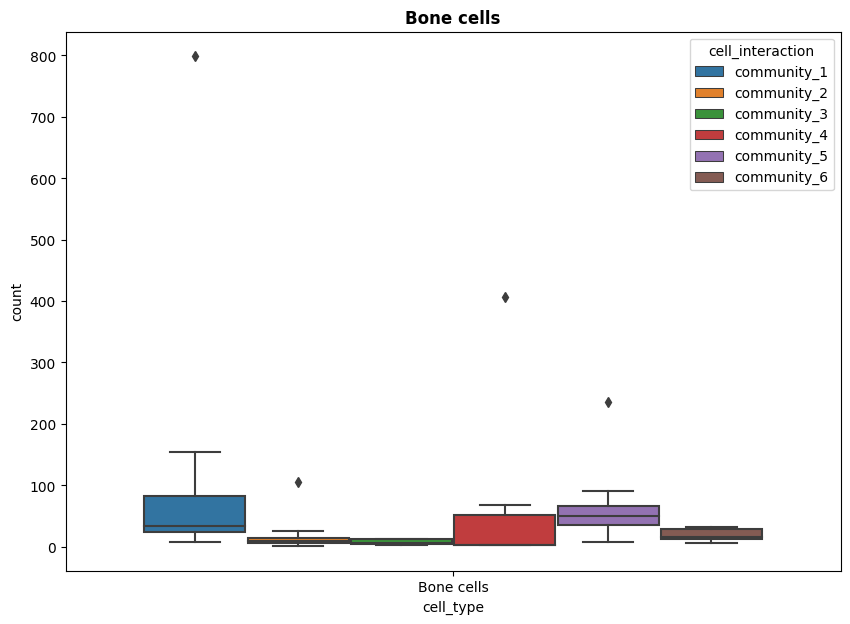

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=bone_cells['cell_type'], y=bone_cells['count'], hue = bone_cells['cell_interaction']) 
ax.set_title('Bone cells', fontweight='bold')

In [ ]:
stats.kruskal(bone_cells[bone_cells['cell_interaction'] == 'community_1']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_2']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_3']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_4']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_5']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=16.995067617636135, pvalue=0.004509160881281219)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([bone_cells[bone_cells['cell_interaction'] == 'community_1']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_2']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_3']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_4']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_5']['count'],
              bone_cells[bone_cells['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,False,False,False,True,True
2,False,True,True,True,False,True
3,False,True,True,True,False,True
4,False,True,True,True,False,True
5,True,False,False,False,True,True
6,True,True,True,True,True,True


In [ ]:
stats.mannwhitneyu(x=bone_cells[bone_cells['cell_interaction'] == 'community_1']['count'],
                   y=bone_cells[bone_cells['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=27.5, pvalue=0.7003792420821644)

In [ ]:
stats.mannwhitneyu(x=bone_cells[bone_cells['cell_interaction'] == 'community_1']['count'],
                   y=bone_cells[bone_cells['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=48.0, pvalue=0.05244755244755244)

В community_1 больше bone_cells, чем во всех других окружениях

Immune type 1

In [ ]:
immune_type1 = df_interaction[df_interaction['cell_type'] == 'Immune type 1']
immune_type1

Text(0.5, 1.0, 'Immune type 1')

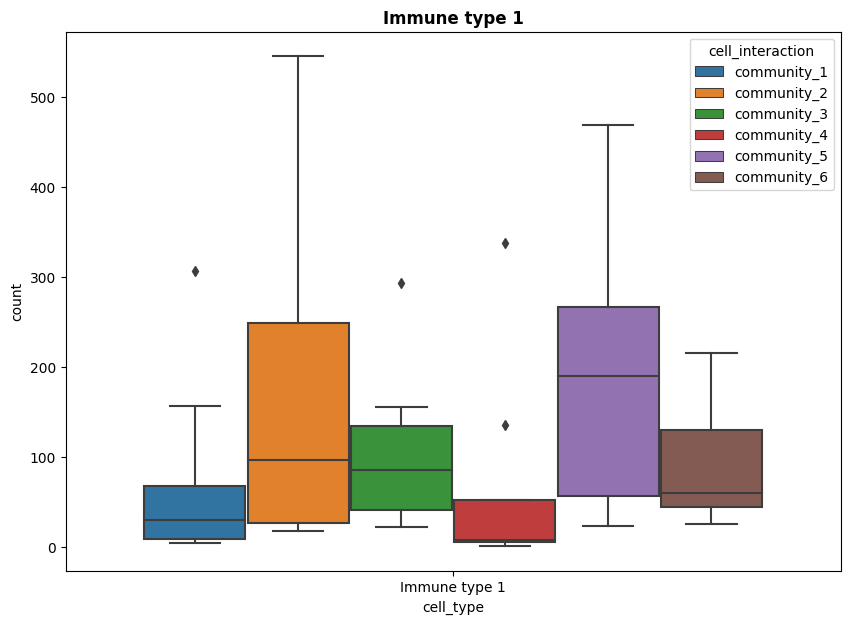

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=immune_type1['cell_type'], y=immune_type1['count'], hue = immune_type1['cell_interaction']) 
ax.set_title('Immune type 1', fontweight='bold')

In [ ]:
stats.kruskal(immune_type1[immune_type1['cell_interaction'] == 'community_1']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_2']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_3']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_4']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_5']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=9.94262662179033, pvalue=0.07687731356218432)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([immune_type1[immune_type1['cell_interaction'] == 'community_1']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_2']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_3']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_4']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_5']['count'],
              immune_type1[immune_type1['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,True,True,True,False,True
2,True,True,True,False,True,True
3,True,True,True,True,True,True
4,True,False,True,True,False,True
5,False,True,True,False,True,True
6,True,True,True,True,True,True


In [ ]:
stats.mannwhitneyu(x=immune_type1[immune_type1['cell_interaction'] == 'community_2']['count'],
                   y=immune_type1[immune_type1['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=27.0, pvalue=0.713131313131313)

In [ ]:
stats.mannwhitneyu(x=immune_type1[immune_type1['cell_interaction'] == 'community_2']['count'],
                   y=immune_type1[immune_type1['cell_interaction'] == 'community_1']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=45.0, pvalue=0.09446872400149708)

In [ ]:
stats.mannwhitneyu(x=immune_type1[immune_type1['cell_interaction'] == 'community_2']['count'],
                   y=immune_type1[immune_type1['cell_interaction'] == 'community_3']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=34.5, pvalue=0.4167571064766576)

In [ ]:
stats.mannwhitneyu(x=immune_type1[immune_type1['cell_interaction'] == 'community_2']['count'],
                   y=immune_type1[immune_type1['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=34.0, pvalue=0.43923853923853917)

В community_2 больше immune type 1, чем во всех других окружениях

Immune type 2

In [ ]:
immune_type2 = df_interaction[df_interaction['cell_type'] == 'Immune type 2']
immune_type2

Text(0.5, 1.0, 'Immune type 2')

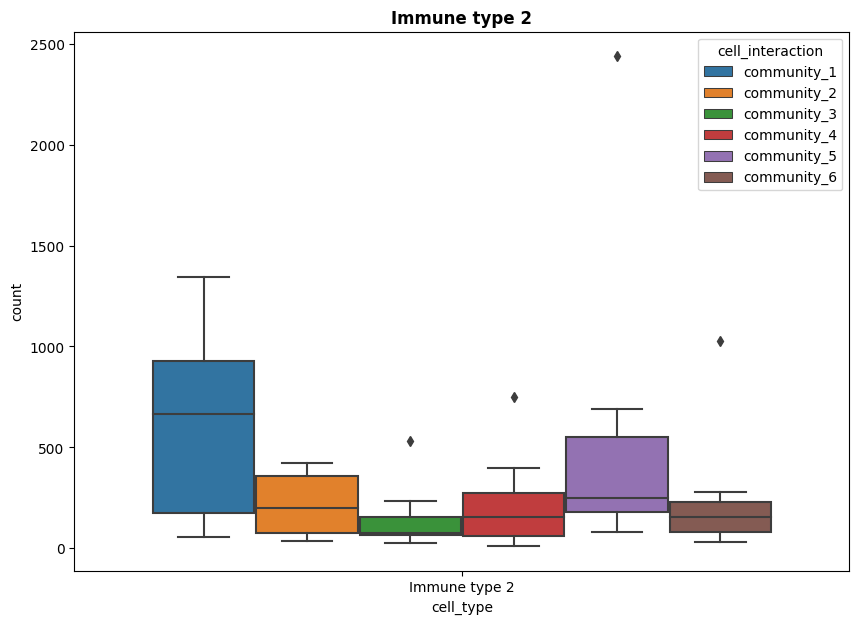

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=immune_type2['cell_type'], y=immune_type2['count'], hue = immune_type2['cell_interaction']) 
ax.set_title('Immune type 2', fontweight='bold')

In [ ]:
stats.kruskal(immune_type2[immune_type2['cell_interaction'] == 'community_1']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_2']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_3']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_4']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_5']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=8.730539572250546, pvalue=0.12030688182646924)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([immune_type2[immune_type2['cell_interaction'] == 'community_1']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_2']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_3']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_4']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_5']['count'],
              immune_type2[immune_type2['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,True,False,True,True,True
2,True,True,True,True,True,True
3,False,True,True,True,False,True
4,True,True,True,True,True,True
5,True,True,False,True,True,True
6,True,True,True,True,True,True


In [ ]:
stats.mannwhitneyu(x=immune_type2[immune_type2['cell_interaction'] == 'community_1']['count'],
                   y=immune_type2[immune_type2['cell_interaction'] == 'community_2']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=49.0, pvalue=0.041491841491841486)

In [ ]:
stats.mannwhitneyu(x=immune_type2[immune_type2['cell_interaction'] == 'community_1']['count'],
                   y=immune_type2[immune_type2['cell_interaction'] == 'community_4']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=48.0, pvalue=0.05244755244755244)

In [ ]:
stats.mannwhitneyu(x=immune_type2[immune_type2['cell_interaction'] == 'community_1']['count'],
                   y=immune_type2[immune_type2['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=37.0, pvalue=0.3226884226884226)

In [ ]:
stats.mannwhitneyu(x=immune_type2[immune_type2['cell_interaction'] == 'community_1']['count'],
                   y=immune_type2[immune_type2['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=46.0, pvalue=0.08026418026418025)

статистически в community 1 immune type 2 больше, чем во всех других community за исключением community 2, где график не подверждается тестом

Largest cells

In [ ]:
largest_cells = df_interaction[df_interaction['cell_type'] == 'Largest cells']
largest_cells

Text(0.5, 1.0, 'Largest cells')

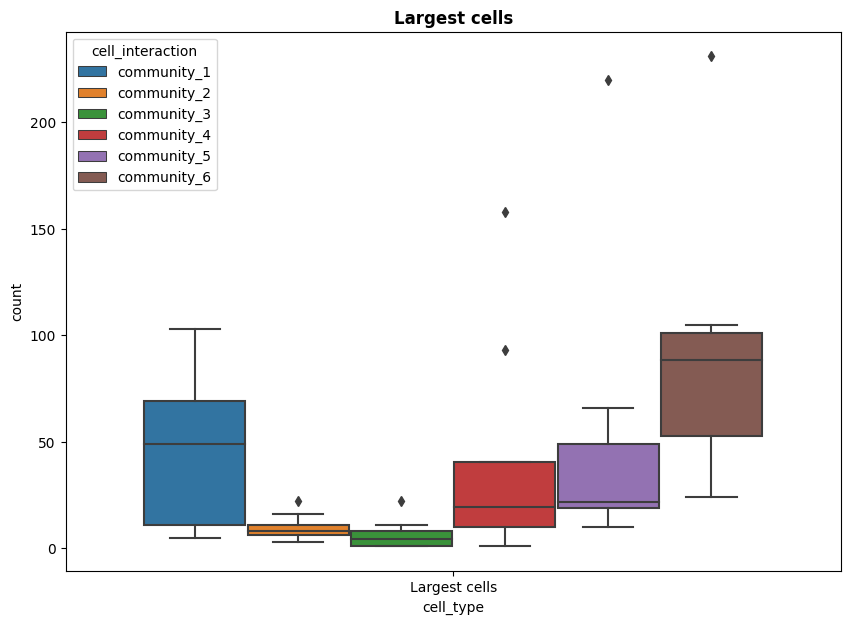

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=largest_cells['cell_type'], y=largest_cells['count'], hue = largest_cells['cell_interaction']) 
ax.set_title('Largest cells', fontweight='bold')

In [ ]:
stats.kruskal(largest_cells[largest_cells['cell_interaction'] == 'community_1']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_2']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_3']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_4']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_5']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=23.78865699222782, pvalue=0.00023838374262455454)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([largest_cells[largest_cells['cell_interaction'] == 'community_1']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_2']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_3']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_4']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_5']['count'],
              largest_cells[largest_cells['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,False,False,True,True,True
2,False,True,True,True,False,False
3,False,True,True,False,False,False
4,True,True,False,True,True,False
5,True,False,False,True,True,True
6,True,False,False,False,True,True


In [ ]:
stats.mannwhitneyu(x=largest_cells[largest_cells['cell_interaction'] == 'community_1']['count'],
                   y=largest_cells[largest_cells['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=16.0, pvalue=0.958551795058888)

In [ ]:
stats.mannwhitneyu(x=largest_cells[largest_cells['cell_interaction'] == 'community_1']['count'],
                   y=largest_cells[largest_cells['cell_interaction'] == 'community_4']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=37.0, pvalue=0.3181271340831978)

In [ ]:
stats.mannwhitneyu(x=largest_cells[largest_cells['cell_interaction'] == 'community_1']['count'],
                   y=largest_cells[largest_cells['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=35.0, pvalue=0.3962986144627732)

в community 1 largest cells больше, чем во всех других community 

Stroma cells

In [ ]:
stroma_cells = df_interaction[df_interaction['cell_type'] == 'Stroma cells']
stroma_cells

Text(0.5, 1.0, 'Stroma cells')

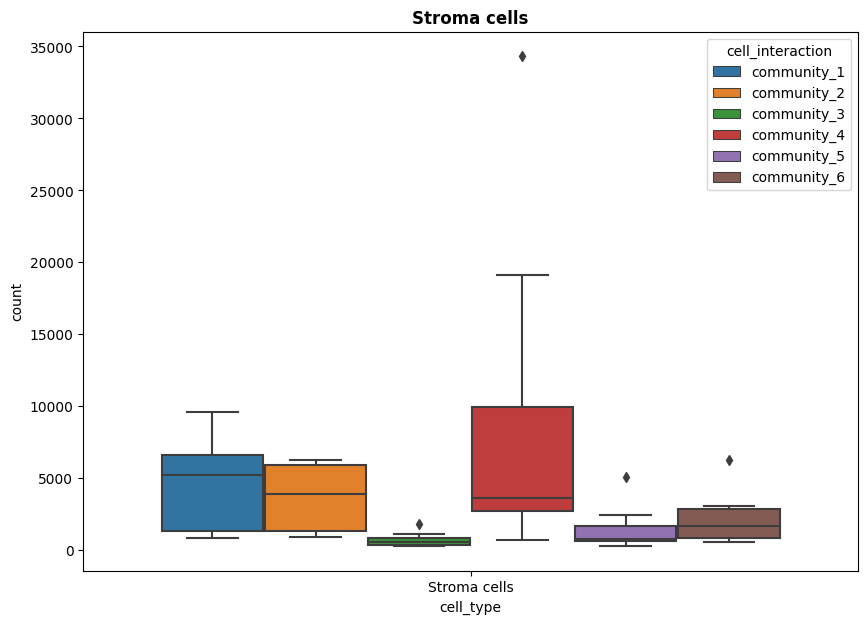

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=stroma_cells['cell_type'], y=stroma_cells['count'], hue = stroma_cells['cell_interaction']) 
ax.set_title('Stroma cells', fontweight='bold')

In [ ]:
stats.kruskal(stroma_cells[stroma_cells['cell_interaction'] == 'community_1']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_2']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_3']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_4']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_5']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=18.727040816326507, pvalue=0.0021605838372889432)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([stroma_cells[stroma_cells['cell_interaction'] == 'community_1']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_2']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_3']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_4']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_5']['count'],
              stroma_cells[stroma_cells['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test > 0.05

,1,2,3,4,5,6
1,True,True,False,True,False,True
2,True,True,False,True,False,True
3,False,False,True,False,True,True
4,True,True,False,True,False,True
5,False,False,True,False,True,True
6,True,True,True,True,True,True


In [ ]:
stats.mannwhitneyu(x=stroma_cells[stroma_cells['cell_interaction'] == 'community_4']['count'],
                   y=stroma_cells[stroma_cells['cell_interaction'] == 'community_1']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=32.0, pvalue=0.5204351204351203)

In [ ]:
stats.mannwhitneyu(x=stroma_cells[stroma_cells['cell_interaction'] == 'community_4']['count'],
                   y=stroma_cells[stroma_cells['cell_interaction'] == 'community_2']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=36.0, pvalue=0.3604506604506604)

In [ ]:
stats.mannwhitneyu(x=stroma_cells[stroma_cells['cell_interaction'] == 'community_4']['count'],
                   y=stroma_cells[stroma_cells['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=49.0, pvalue=0.041491841491841486)

статистически в community 4 stroma cells больше, чем во всех других community за исключением community 6, где график не подверждается тестом

Unclassified

In [ ]:
unclassified = df_interaction[df_interaction['cell_type'] == 'Unclassified']
unclassified

Text(0.5, 1.0, 'Unclassified')

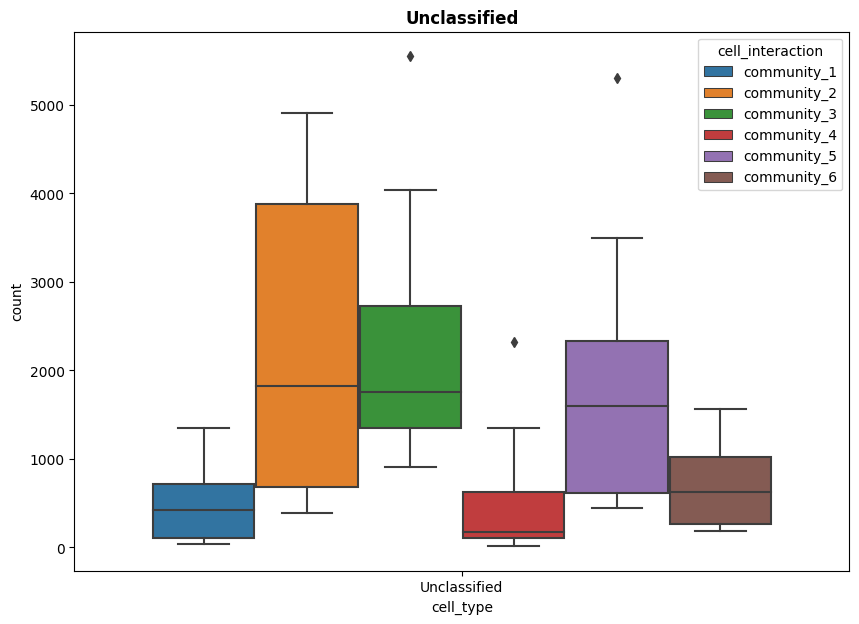

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=unclassified['cell_type'], y=unclassified['count'], hue = unclassified['cell_interaction']) 
ax.set_title('Unclassified', fontweight='bold')

In [ ]:
stats.kruskal(unclassified[unclassified['cell_interaction'] == 'community_1']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_2']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_3']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_4']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_5']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=18.966836734693857, pvalue=0.0019496673303232715)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([unclassified[unclassified['cell_interaction'] == 'community_1']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_2']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_3']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_4']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_5']['count'],
              unclassified[unclassified['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,False,False,True,False,True
2,False,True,True,False,True,True
3,False,True,True,False,True,False
4,True,False,False,True,False,True
5,False,True,True,False,True,True
6,True,True,False,True,True,True


In [ ]:
stats.mannwhitneyu(x=unclassified[unclassified['cell_interaction'] == 'community_2']['count'],
                   y=unclassified[unclassified['cell_interaction'] == 'community_3']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=29.0, pvalue=0.6395493395493393)

In [ ]:
stats.mannwhitneyu(x=unclassified[unclassified['cell_interaction'] == 'community_2']['count'],
                   y=unclassified[unclassified['cell_interaction'] == 'community_5']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=34.0, pvalue=0.43923853923853917)

In [ ]:
stats.mannwhitneyu(x=unclassified[unclassified['cell_interaction'] == 'community_2']['count'],
                   y=unclassified[unclassified['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=51.0, pvalue=0.02494172494172494)

в community 2 unclassified больше, чем во всех других community, кроме community 6 где график не подтверждается тестом

Vasculature

In [ ]:
vasculature = df_interaction[df_interaction['cell_type'] == 'Vasculature']
vasculature

Text(0.5, 1.0, 'Vasculature')

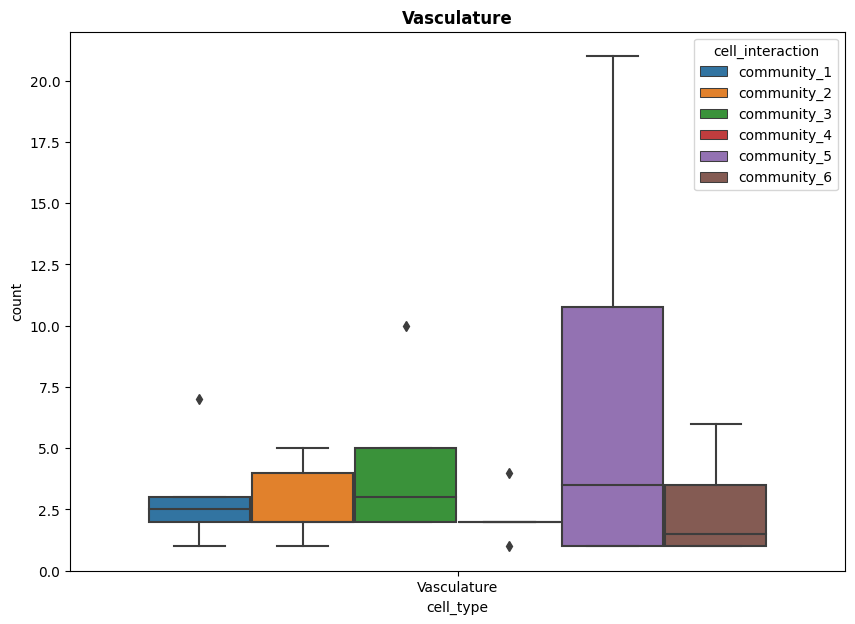

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

sns.boxplot(x=vasculature['cell_type'], y=vasculature['count'], hue = vasculature['cell_interaction']) 
ax.set_title('Vasculature', fontweight='bold')

In [ ]:
stats.kruskal(vasculature[vasculature['cell_interaction'] == 'community_1']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_2']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_3']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_4']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_6']['count']
                )

KruskalResult(statistic=2.8982647496281704, pvalue=0.7156668238597411)

In [ ]:
posthoc_dunn_test = sp.posthoc_dunn([vasculature[vasculature['cell_interaction'] == 'community_1']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_2']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_3']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_4']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
              vasculature[vasculature['cell_interaction'] == 'community_6']['count']])

In [ ]:
posthoc_dunn_test >= 0.05

,1,2,3,4,5,6
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True


In [ ]:
stats.mannwhitneyu(x=vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
                   y=vasculature[vasculature['cell_interaction'] == 'community_1']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=28.5, pvalue=0.299747715423338)

In [ ]:
stats.mannwhitneyu(x=vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
                   y=vasculature[vasculature['cell_interaction'] == 'community_2']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=32.0, pvalue=0.3405510459985448)

In [ ]:
stats.mannwhitneyu(x=vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
                   y=vasculature[vasculature['cell_interaction'] == 'community_3']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=19.5, pvalue=0.5586733784573097)

In [ ]:
stats.mannwhitneyu(x=vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
                   y=vasculature[vasculature['cell_interaction'] == 'community_4']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=25.0, pvalue=0.2505564311233637)

In [ ]:
stats.mannwhitneyu(x=vasculature[vasculature['cell_interaction'] == 'community_5']['count'],
                   y=vasculature[vasculature['cell_interaction'] == 'community_6']['count'],
                   alternative='greater')

MannwhitneyuResult(statistic=31.0, pvalue=0.19093583199734931)

в community 5 vasculature больше, чем во всех других окружениях

Задача 3

In [ ]:
count_of_cells = community_dataset[['case_id', 
                                    'area_of_cell'
                                    ]].groupby(by=['case_id']).count().reset_index().rename({'area_of_cell':'total'},axis=1)
count_of_cells

In [ ]:
cells_by_interaction = community_dataset[['case_id', 'area_of_cell', 'cell_interaction'
                                          ]].groupby(by=['case_id','cell_interaction'
                                                         ]).count().reset_index().rename({'area_of_cell':'total_by_interaction'},axis=1)
cells_by_interaction

In [ ]:
community_dataset.join(count_of_cells.set_index('case_id'), on='case_id')

In [ ]:
new_community_dataset = community_dataset.join(count_of_cells.set_index('case_id'), on='case_id')
new_community_dataset = pd.merge(new_community_dataset, 
                                 cells_by_interaction, how='left', on=['case_id', 'cell_interaction'])
new_community_dataset

In [ ]:
new_community_dataset['share'] = new_community_dataset['total_by_interaction']/new_community_dataset['total']

In [ ]:
new_community_dataset

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_2_elder_group vs. community_2_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.624e+07
community_1_elder_group vs. community_1_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=5.154e+07
community_3_elder_group vs. community_3_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.656e+08
community_4_elder_group vs. community_4_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.258e+07
community_5_elder_group vs. community_5_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.942e+08
community_6_elder_group vs. community_6_young_group: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.730e+08


(<AxesSubplot: xlabel='cell_interaction', ylabel='share'>,
  <statannotations.Annotation.Annotation at 0x19c5b56cdc0>])

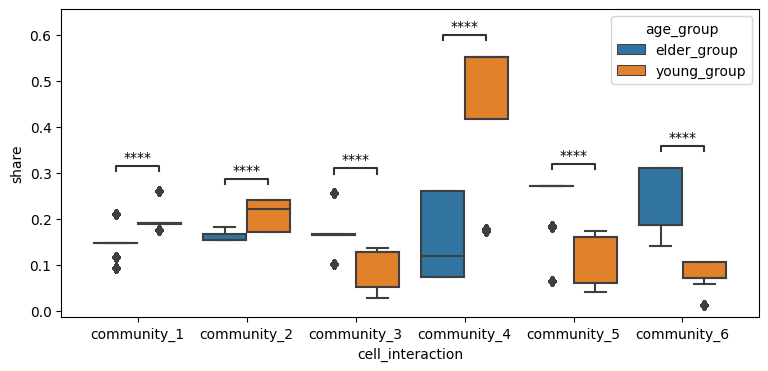

In [231]:
fig, ax = plt.subplots()

fig.set_size_inches((9, 4))

hue_order=["elder_group", "young_group"]

pairs = [(('community_1', 'elder_group'), ('community_1', 'young_group')), 
        (('community_2', 'elder_group'), ('community_2', 'young_group')),
        (('community_3', 'elder_group'), ('community_3', 'young_group')),
        (('community_4', 'elder_group'), ('community_4', 'young_group')),
        (('community_5', 'elder_group'), ('community_5', 'young_group')),
        (('community_6', 'elder_group'), ('community_6', 'young_group'))
        ]

sns.boxplot(x=new_community_dataset['cell_interaction'], 
            y=new_community_dataset['share'], 
            hue=new_community_dataset['age_group'],
            ax=ax,
            hue_order=hue_order
           )

annotator = Annotator(ax, pairs, 
                      data=new_community_dataset, 
                      x='cell_interaction', 
                      y='share', 
                      hue_order=hue_order,
                      hue='age_group'
                     )
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()
# plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title=hue)
   

Доли микроокружений в тканях пациентов разных возрастов во всех community значимо отличаются

Задача 4